# Goals 

The goal of this part of the tutorial is build your skills in: 
   - Asking good questions 
   - Working with data
   - Exploratory Data Analysis
   - Learn about a few types of regression
       - Linear regression
       - Logistic regression 
       - Lasso regularization 
       - Ridge regularization 
   - Fit a model 
   - Evaluate the model, using accuracy and ROC 
   - Predicting whether a movie will win an Oscar

## We're going to make an award winning movie! 

In the last section, we wanted to explore what movie features would make us a huge pile of money. But now, we have moved on from our desire for earthly goods like money. We have moved on to more nobel goals like  <span>**FAME & ETERNAL GLORY**</span>!! To cement our place in the history books, we need to figure out how to make a movie that will win an [Academy Award aka Oscar](https://en.wikipedia.org/wiki/Academy_Awards)!!  

<img src="https://cbsnews2.cbsistatic.com/hub/i/r/2014/03/03/63e74ae4-8175-4c17-b2c6-930f945fc2e9/thumbnail/620x350/7a32fdb6196986fcd86888fc40a1f6d7/476261125.jpg"
     alt="Oscars"
     style="align: center"/>



# Ask a good question 

Given our new life outlook and a dataset that includes all of the information we could want about every movie ever made, including those that had won Oscars, what kind of questions are we trying to get the data to answer? 

### Try it out! 

Come up with some questions that you would like the answers to. Discuss with your group, and be prepared to share your answers.  

*your answer here*

# Finding good data (& revising your questions)

<img src="http://www.clker.com/cliparts/h/3/h/f/L/d/red-light-bulb.svg"
     alt="red alert"
     style="align: center"/>

Uh oh! We have some late breaking news about our data source! While we were planning on getting all of the information for every movie from IMDPy, that turned out to be (a) way too many movies, and (b) way to slow.  

We still need to find some features that could increase the likelihood that we will win an Academy Award, and all we have is this spreadsheet with some data features for all the movies nominated for an Academy Award from 1981 - 2005. ** What do we do? Is there any way we can salvage this situation?**

*your answer here*

# Exploratory Data Analysis

So we have this spreadsheet that we dumped into a Pandas DataFrame. Let's take a look at it and see what we can learn about it! 

In [112]:
%matplotlib inline 
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import cPickle as pickle
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.metrics as metrics

from collections import defaultdict
from datetime import datetime

import io
import time
import math
import operator
import warnings
warnings.filterwarnings('ignore')

In [113]:
# Load dict of Oscar nominated movies and convert to DataFrame
AAdf_complete = pd.DataFrame.from_dict(pickle.load(open('AAdict_complete.p','rb'))).transpose()

In [114]:
# Load dataframe of Oscar nominated movies minus outcomes 
AAdf = pd.read_pickle('AAdict.p')

Print the first few rows of the dataframe. 

In [115]:
# your code here 
AAdf.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,France,Germany,History,Horror,Italy,Music,Musical,Mystery,News,Nominated Best Actor,Nominated Best Actress,Nominated Best Animated Feature Film,Nominated Best Art Direction,Nominated Best Cinematography,Nominated Best Costume Design,Nominated Best Director,"Nominated Best Documentary, Feature","Nominated Best Documentary, Short Subject",Nominated Best Film Editing,Nominated Best Foreign Language Film,Nominated Best Makeup,"Nominated Best Music, Adaptation / Original Song Score","Nominated Best Music, Dramatic Score","Nominated Best Music, Musical or Comedy Score","Nominated Best Music, Original Score","Nominated Best Music, Song",Nominated Best Picture,"Nominated Best Short Film, Animated","Nominated Best Short Film, Live Action",Nominated Best Sound,Nominated Best Sound Editing,Nominated Best Sound Effects Editing,Nominated Best Sound Mixing,Nominated Best Supporting Actor,Nominated Best Supporting Actress,Nominated Best Visual Effects,"Nominated Best Writing, Adapted Screenplay","Nominated Best Writing, Original Screenplay",Nominated Special Achievement Award,OtherCountry/Unknown,Romance,Sci-Fi,Short,Spain,Sport,Thriller,USA,War,Western,based-on-novel,blockbuster,blood,character-name-in-title,cigarette-smoking,cult-film,dancing,death,family-relationships,father-daughter-relationship,father-son-relationship,female-nudity,flashback,friendship,husband-wife-relationship,independent-film,love,marriage,month,mother-daughter-relationship,mother-son-relationship,mpaaint,murder,numnominations,quarter,runtime,sex,singing,title-spoken-by-character,violence,winner,year
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"""Until"": Sting (Music & Lyric)",False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,12,0,0,2,0,1,4,118,0,0,0,0,0,2001
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,Burt Lancaster,Susan Sarandon,False,False,False,False,Louis Malle,False,False,False,False,False,False,False,False,False,False,"Denis Heroux, John Kemeny (Producers)",False,False,False,False,False,False,False,False,False,False,John Guare,False,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,1,5,2,104,0,0,1,0,0,1981
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,Tambi Larsen (Art Direction); Jim Berkey (Set ...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,11,0,0,0,1,1,4,149,0,0,0,1,0,1981
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Paul Newman,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Melinda Dillon,False,False,Kurt Luedtke,False,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,1,3,4,116,0,0,1,0,0,1981
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,"Suzanne Bauman, Paul Neshamkin, Jim Burroughs ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,60,0,0,0,0,0,1981


What shape is the dataframe? 

In [116]:
# your code here
print(AAdf.shape)

(1364, 91)


Print all of the dataframe's column headers. 

In [117]:
# your code here
AAdf.columns

Index([                                                u'Action',                                              u'Adventure',                                              u'Animation',                                              u'Biography',                                                 u'Comedy',                                                  u'Crime',                                            u'Documentary',                                                  u'Drama',
                                                       u'Family',                                                u'Fantasy',                                                 u'France',                                                u'Germany',                                                u'History',                                                 u'Horror',                                                  u'Italy',                                                  u'Music',
                                          

You might notice that some of these variables are *continuous* while some are *categorical*. It can be helpful to look at these separately, so we make lists of indices, so that we can access these separately. 

In [118]:
# write selectors for categorical or continuous variables
CONTINUOUS = set(['month','mpaaint','numnominations','quarter','runtime'])

CATEGORICAL = set(list(AAdf.columns)) - set(CONTINUOUS)
CATEGORICAL.remove(u'winner')
CATEGORICAL.remove('year')

Now, we will use exploratory data analysis to answer a few questions: 
    
1. Do some countries tend to win more Oscars? 
2. What is the frequency of the top keywords among Oscar winners?
3. What genres tend to win Oscars?
4. In what month do Oscar Winning movies tend to be released? 

To do this, we start by making a list of the genres, countries, and keywords in our dataset. This was a lot of messy code that took awhile to run. So to make your life easier, we'll just load the outputs here. 

In [119]:
genres_list = pickle.load(io.open('genres_list.p', 'rb'))
keywords_dict = pickle.load(io.open('keywords_dict.p', 'rb'))
countries_dict = pickle.load(io.open('countries_dict.p', 'rb'))

### Countries with the most winners per nominee 

Do some countries win Oscars more often than others?  

In [120]:
# Create dictionary of countries ratio (winner/total)
countries_dict_ratio = {}
for country in countries_dict.keys():
    countries_dict_ratio[country] = sum(AAdf[AAdf['winner']==1][country]) / float(countries_dict[country])
    
# Sort countries in order by ratio
sorted_countries = sorted(countries_dict_ratio.items(), key=operator.itemgetter(1))

# if you're an overacheiver, you can also get the mean squared error.
countries_dict_ratiosd = {}
for country in countries_dict.keys():
    countries_dict_ratiosd[country] = np.sqrt((countries_dict_ratio[country] * (1 - countries_dict_ratio[country])) / countries_dict[country])

xerr = []
for key in sorted_countries:
    xerr.append(countries_dict_ratiosd[key[0]])

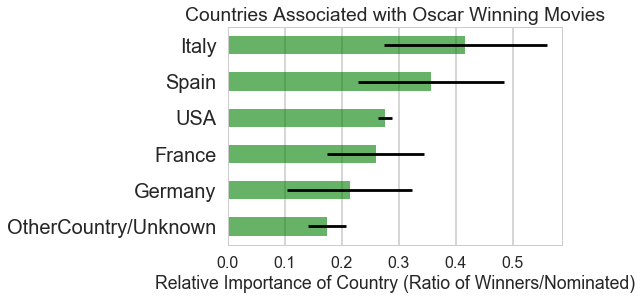

In [121]:
# Make your your plot beautiful!
loc1 = [0.5,1.5,2.5,3.5,4.5,5.5]
fig, ax = plt.subplots()
ax.barh(bottom=loc1,width=zip(*sorted_countries)[1],height=0.5, color='g', alpha = .6, align='center', xerr=xerr)
ax.set_ylim(0,6)
ax.set_yticks(loc1)
ax.set_yticklabels(zip(*sorted_countries)[0], size=20)
ax.set_title('Countries Associated with Oscar Winning Movies')
ax.set_xlabel("Relative Importance of Country (Ratio of Winners/Nominated)")
ax.yaxis.grid(False)
ax.legend()
plt.show()

** What did you learn from this plot?** 

*your answer here*

### What are the most poweful plot elements? 

Do epic war battles win Oscars? Does there need to be a dramatic romance? With this plot, we will try to learn more about what the most common plot elements are in films that win academy awards. 

Hint: To do this, you can follow a similar pattern to what we did in the last example. 

In [122]:
# Your code here 
keywords_dict_ratio = {}
keywords_dict_ratiosd = {}

for keyword in keywords_dict.keys():
    keywords_dict_ratio[keyword] = sum(AAdf[AAdf['winner']==1][keyword]) / float(keywords_dict[keyword])
    keywords_dict_ratiosd[keyword] = np.sqrt((keywords_dict_ratio[keyword] * (1 - keywords_dict_ratio[keyword])) / keywords_dict[keyword])

# sort the movie by ratio
sorted_keywords = sorted(keywords_dict_ratio.items(), key=operator.itemgetter(1))

# calculate error 
xerr = []
for key in sorted_keywords:
    xerr.append(keywords_dict_ratiosd[key[0]])

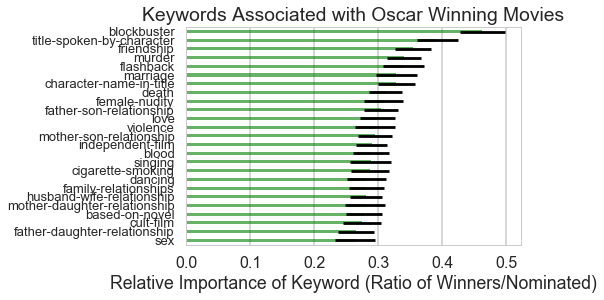

In [123]:
# make your plot beautiful! 
loc1 = range(len(sorted_keywords))
fig, ax = plt.subplots()
ax.barh(loc1,zip(*sorted_keywords)[1], 0.35, color='g', label='loser', alpha = .6, align="center",xerr=xerr)
ax.set_ylim(-0.5,24.5)
ax.set_yticks(np.arange(len(zip(*sorted_keywords)[0])))
ax.set_yticklabels(zip(*sorted_keywords)[0], size=13)
ax.set_title("Keywords Associated with Oscar Winning Movies")
ax.set_xlabel("Relative Importance of Keyword (Ratio of Winners/Nominated)")
ax.yaxis.grid(False)
plt.show()

** What did you learn from this plot?** 

*your answer here*

### Which genres are most common among Oscar winning movies? 

Does an Oscar winning movie need Drama? Romance? Crime? Comedy? In this section, we use a similar analysis to learn more about what genre Oscar winning films tend ot have. 

In [124]:
# Your code here 
# Create dictionary of genre ratios (winner/total)
genres_dict_ratio = {}
genres_dict_ratiosd = {}
for genre in genres_list:
    genres_dict_ratio[genre] = sum(AAdf[AAdf['winner']==1][genre]) / float(sum(AAdf[genre]))
    genres_dict_ratiosd[genre] = np.sqrt((genres_dict_ratio[genre] * (1 - genres_dict_ratio[genre])) / float(sum(AAdf[genre])))

# sort the movie by ratio
sorted_genres = sorted(genres_dict_ratio.items(), key=operator.itemgetter(1))

# manage the error
xerr = []
for key in sorted_genres:
    sd = genres_dict_ratiosd[key[0]]
    if sd == 0:
        sd = 1
    xerr.append(sd)

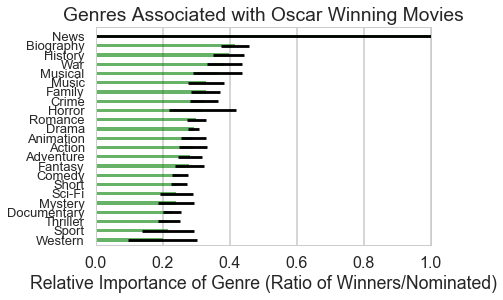

In [125]:
loc1 = range(len(sorted_genres))
fig, ax = plt.subplots()
ax.barh(loc1,zip(*sorted_genres)[1], 0.35, color='g', label='loser', alpha = .6, align='center', xerr=xerr)
ax.set_xlim(0,1)
ax.set_ylim(-0.5,len(zip(*sorted_genres)[0]))
ax.set_yticks(np.arange(len(zip(*sorted_genres)[0])))
ax.set_yticklabels(zip(*sorted_genres)[0], size=13)
ax.set_title("Genres Associated with Oscar Winning Movies")
ax.set_xlabel("Relative Importance of Genre (Ratio of Winners/Nominated)")
ax.yaxis.grid(False)
plt.show()

** What did you learn from this plot?** 

*your answer here*

### When are Oscar winning movies most often released?


To start off, let's find how many Oscar-nominated films are released each month. 

In [126]:
month_name_dict = {0:'Unknown',1:'January',2:"Feburary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
month_dict = {}
for month in range(13):
    month_dict[month_name_dict[month]] = len(AAdf[(AAdf['month']==month)]) 
del month_dict['Unknown']
    
sorted_month_dict = sorted(month_dict.items(), key=operator.itemgetter(1))

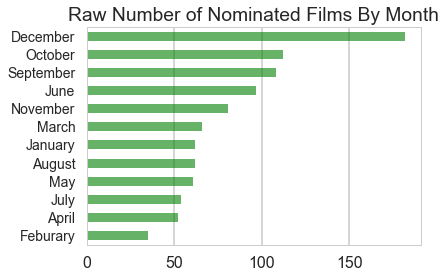

In [127]:
loc1 = range(len(zip(*sorted_month_dict)[1]))
loc2 = [.35, 1.35,2.35,3.35,4.35,5.35, 6.35, 7.35, 8.35, 9.35,10.35, 11.35]
fig, ax = plt.subplots()
ax.barh(loc1, zip(*sorted_month_dict)[1], 0.5, color='g', alpha = .6, align="center")
ax.set_ylim(-0.5,11.5)
ax.set_yticks(np.arange(len(zip(*sorted_month_dict)[1])))
ax.set_yticklabels(zip(*sorted_month_dict)[0], size=14)
ax.set_title('Raw Number of Nominated Films By Month')
ax.yaxis.grid(False)
plt.show()

** What did you learn from this plot?** 

*your answer here*

After looking at the distribution of Oscar nominated films each month, you might start to wonder, do the movies that win show a similar distribution? 

In [128]:
month_dict_winner = {}
for month in range(13):
    month_dict_winner[month_name_dict[month]] = len(AAdf[(AAdf['month']==month) & AAdf['winner']==1])
del month_dict_winner['Unknown']

sorted_month_winners = sorted(month_dict_winner.items(), key=operator.itemgetter(1))

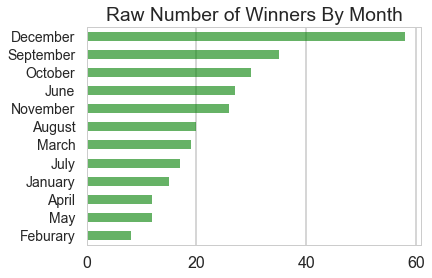

In [129]:
fig, ax = plt.subplots()
ax.barh(loc1, zip(*sorted_month_winners)[1], 0.5, color='g', alpha = .6, align="center")
ax.set_ylim(-0.5,11.5)
ax.set_yticks(np.arange(len(zip(*sorted_month_winners)[1])))
ax.set_yticklabels(zip(*sorted_month_winners)[0], size=14)
ax.set_title('Raw Number of Winners By Month')
ax.yaxis.grid(False)
plt.show()

** What did you learn from this plot?** 

*your answer here*

Now that we know: 
- how many movies are nominated for an Oscar each month 
- how many movies win an Oscar each month 

We can calculate the probability that a movie will win an Oscar given that it is released in a certain month by calculating the ratio of these two numbers. 

In [130]:
month_dict_ratio = {}
month_dict_ratiosd = {}
for month in range(13):
    month_dict_ratio[month_name_dict[month]] = len(AAdf[(AAdf['month']==month) & AAdf['winner']==1]) / float(sum(AAdf['month']==month))    
    month_dict_ratiosd[month_name_dict[month]] = np.sqrt((month_dict_ratio[month_name_dict[month]] * (1 - month_dict_ratio[month_name_dict[month]]))) / float(sum(AAdf['month']==month))  
del month_dict_ratio['Unknown']

sorted_month_ratio = sorted(month_dict_ratio.items(), key=operator.itemgetter(1))

xerr = []
for key in sorted_month_ratio:
    sd = month_dict_ratiosd[key[0]]
    if sd == 0:
        sd = 1
    xerr.append(sd)

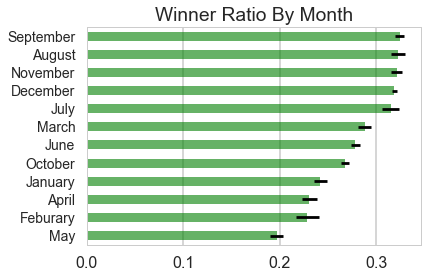

In [131]:
fig, ax = plt.subplots()
ax.barh(loc1, zip(*sorted_month_ratio)[1], 0.5, color='g', label='winner', alpha = .6, align="center", xerr=xerr)
ax.set_ylim(-0.5,11.5)
ax.set_yticks(np.arange(len(zip(*sorted_month_ratio)[1])))
ax.set_yticklabels(zip(*sorted_month_ratio)[0], size=14)
ax.set_title('Winner Ratio By Month')
ax.yaxis.grid(False)
plt.show()

** What did you learn from this plot?** 

*your answer here*

# Regression 

This exploratory data analysis has taught us alot about our data!! But we wanted to use a model to try predict what makes an Oscar winner. To do this, we will start with a method called regression.  

There are many types of regression and selecting an appropriate regression can be harder than it looks. 

<img src="https://imgs.xkcd.com/comics/linear_regression.png"
     alt="https://xkcd.com/1725/"
     style="align: center"/>


## Linear Regression

- Outcome: Continuous 
- Error minimization: [Ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)
- Large errors are penalized more 
- No regularization 

## Logistic Regression 

- Outcome: Categorical  
- Error minimization: [Maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) 
- All errors are penalized similarly 
- No regularization 

Here is an image of what the two methods look like. 

<img src="https://i.stack.imgur.com/rhVmk.jpg"
     alt="Stack overflow"
     style="align:center"/>

Sometimes you need to deal with problems like [overfitting](https://en.wikipedia.org/wiki/Overfitting), a symptom of high variance, and [underfitting](https://en.wikipedia.org/wiki/Overfitting#Underfitting), a sympton of high bias. 


<img src="https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png"
     alt=""
     style="float: left; margin-right: 100px;"/>


## Regularization methods 

To prevent overfitting and underfitting, we can add a penalty term to our formula to keep our regression from taking any one data point too seriously. This penalty is called *regularization*, and there are a few ways of doing it.  

### Lasso 
- Error minimization: [Least Absolute Shrinkage & Selection Operator (Lasso)](https://en.wikipedia.org/wiki/Lasso_(statistics))
- Loss function uses squared error

### Ridge

- Error minimization: [Ridge](https://en.wikipedia.org/wiki/Tikhonov_regularization)
- Loss function the absolute value of the error

If you're curious, this [blog post](https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/) provides a great overview of how both of these methods work. For this tutorial, it is probably ok to just understand that these are two forms of regularization to prevent overfitting. 

# Fit models 

Given what you know about the different types of regressions, what do you think will be a good one for us to use to predict Oscar winners? Do we want a continuous outcome or a categorical one? 

Winning vs. Not Winning is a categorical outcome, so will start with a logistic regression.

## Split data into training data & test data   

In [132]:
# scale runtime variable in preparation for model building
from sklearn import preprocessing
AAdf.loc[:,'runtime'] = preprocessing.scale(AAdf['runtime'])

In [133]:
# Test Set:  will be 2005-2006 movies
itest = AAdf.index[AAdf['year']>=2005].copy()
testdf = AAdf[AAdf['year']>=2005].copy()
# Training Set:  1981-2004 movies
itrain = AAdf.index[AAdf['year']<2005].copy()
traindf = AAdf[AAdf['year']<2005].copy()

# create mask for do_classify 
mask=np.ones(AAdf.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
lcols = list(CATEGORICAL) + list(CONTINUOUS)

## Define some functions to help our classification  

** (Optional) Read this if you are interested, but it is not essential **

The `do_classify` function takes as arguments a classifer `clf`, a dictionary of `parameters` which will be passed to GridSearchCV in order to find the best parameter, the training dataframe `indf`, the list of predictors `featurenames`, the column and value which indicates the winners `targetname` and `target1val`, either an array of if the observation is part of the training set `mask` or as an alternative a dictionary used to provide training and test sets passed in as `reusesplit`, the option to pass in a score function as `score_func`, a default of 5-fold cross validation `n_folds` and the default of 1 for `n_jobs`.

The `cv_optimize` function is used in the `do_classify` function to loop through the `parameters` given using Grid Search. It obtains the best model by the average cross-validation score and returns the best model.

Finally the `do_classify` function fits the training set and test set to the best model found in `cv_optimize`, and returns an accuracy for each.  A confusion matrix is also printed out for the predictions on the test set in order to see how many movies were classified correctly, the number of false positives, and the number of false negatives.

In [134]:
from sklearn.grid_search import GridSearchCV
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_
    best = gs.best_estimator_
    return best

In [135]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, 
                score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if not(mask is  None):
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if not(reuse_split is None):
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy Score on training data: %0.3f" % (training_accuracy)
    print "Accuracy Score on test data:     %0.3f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

#### Logistic Ridge Regression

In [1]:
AAdf = pd.read_pickle('AAdf2.p')

NameError: name 'pd' is not defined

In [137]:
from sklearn.linear_model import LogisticRegression

clflog_ridge, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l2"),
                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, 
                                                   indf=AAdf, featurenames=lcols, targetname='winner', 
                                                   target1val=1, mask=mask, score_func='f1')

using mask
BEST {'C': 1.0} 0.488753242452
############# based on standard predict ################
Accuracy Score on training data: 0.814
Accuracy Score on test data:     0.786
[[77  3]
 [21 11]]
########################################################


In [138]:
# reuse our split for later do_classify calls
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

#### Logistic Lasso Regression

In [139]:
clflog_lasso, _, _, _, _ = do_classify(LogisticRegression(penalty="l1"),
                                       {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, 
                                       indf=AAdf, featurenames=lcols, targetname='winner', 
                                       target1val=1, reuse_split=reuse_split, score_func='f1')

using reuse split
BEST {'C': 1.0} 0.489869846227
############# based on standard predict ################
Accuracy Score on training data: 0.809
Accuracy Score on test data:     0.795
[[77  3]
 [20 12]]
########################################################


# Evaluate model performance

## Look at accuracy

One way to evaluate our model is look at its accuracy. For example, if we are classifying movies as Oscar winners or not. What proportion of movies can we correctly identify as Oscar winners?

## Error Rates 

Confusion matrices are great because they allow us to see what types of errors are model makes! If our model makes systematic errors, we need to know that! It is easiest to think about error rates in the context of a binary confusion matrix. 

<img src="img/binaryconfusionmatrix.png"
     alt="Example Great Movie"
     style="align: center"/>

## Baseline classifiers

To evaluate our model, first we need to know how it would perform in comparison to the simplest classifiers. 

Putting this in terms of our example: 
   - True Positive = You predicted a movie would get an Oscar, and it did! 
   - True Negative = You predicted a movie would *not* get an Oscar, and it did not get one. 
   - False Positive = You predicted a movie would get an Oscar, and it did *not*.
   - False Negative = You predicted a movie would *not* get an Oscar, but it did. 

In [140]:
# Baseline: all losers 
testsize = AAdf[~mask].shape[0]
ypred_nowins = np.zeros(testsize, dtype="int")
conf_nowins = confusion_matrix(list(testdf['winner']), ypred_nowins)
print conf_nowins
print "Accuracy on test data:", (float(conf_nowins[0,0]+conf_nowins[1,1])/testsize)

[[80  0]
 [32  0]]
Accuracy on test data: 0.714285714286


In [141]:
# Baseline: all winners 
ypred_allwins = np.ones(testsize, dtype="int")
conf_allwins = confusion_matrix(list(testdf['winner']), ypred_allwins)
print conf_allwins
print "Accuracy on test data:", (float(conf_allwins[0,0]+conf_allwins[1,1])/testsize)

[[ 0 80]
 [ 0 32]]
Accuracy on test data: 0.285714285714


By classifying all movies as winners we would get 27.6% accuracy, surley we can do better than this.  On the other hand, by classifying all movies as loser we would get 72.4% accuracy!  Accuracy is calculated as the following:

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.  However, the goal is to predict Oscar winners - accuracy does not seem to be the best way to measure how good we are doing. We can already achieve fairly high accuracy by just predicting every nominee as a loser! Instead we consider recall as a good measurement of how well our classifiers are doing. Recall is the probability of predicting an Oscar winner correctly out of all Oscar winning movies.  Recall is defined as:

$$ Recall = \frac{TP}{TP + FN}$$

Since there are only about a quarter of all nominated movies that win in a year, we want to minimize missing Oscar winners.  However we also do not want a classifier that predicts movies as winners when they are not.  We want a classifier that does not just arbitrarly classifer movies as winners.  For this we consider precision:

$$ Precision = \frac{TP}{TP + FP} $$

A way to combine these two measurements is to use an F1 score to measure how well our classifiers are doing.  F1 can be defined as:
$$ F1 = \frac{precision \cdot recall}{precision + recall} $$


## Explore your errors

Exploring the types of errors made by your model is super important! I recommend doing at least a simple check whenever you check model accuracy. 

While the internet and our newfound scraping skills can give us a ton of data, to develop good models, we need to consider that data with some skepticism and look at the errors our models make. 

For example, movies makers are notorious for overrepresenting some parts of society while underrepresenting others. While a movie audience is made of 50% women, only 24% of movie leads are women. 68% of all female characters were white in the top 100 films of 2017. 16% were Black, 7% were Asian, 7% were Latina, and 2% were of another race or ethnicity [[Women & Hollywood](https://womenandhollywood.com/resources/statistics/)]. 

This means that if we want to use movie data from previous, we have to be aware that most of the leads and speaking characters are going to have light skin and ~76% of them will be male.

One clear example of how this can go wrong can be demonstrated by facial recognition software. Joy was a graduate student at the MIT Media Lab, working facial detection software, but she had trouble testing her code because the out of the box face detection software never detected her face. To test her code, she had to wear a white mask to be recognized. 
     
Because the training data contained many light-skinned faces, the software was incapable of recognizing faces that deviated from that norm. 

<img src="img/joy.png"
     alt="Bias in ML"
     style="align: center"/>


## ROC curves 

The [receiver operator characteristic curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) gives us a visual way to minimize both our type I and type II errors. A good model will have as much area under the curve as possible. 

### Helper function that plots an ROC curve for us 

In [142]:
# Roc curve function
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

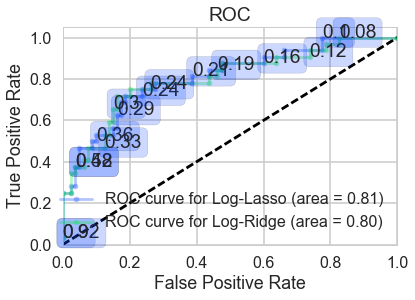

In [143]:
with sns.color_palette("bright"):
    ax = make_roc('Log-Lasso', clflog_lasso, ytest, Xtest)
    make_roc('Log-Ridge', clflog_ridge, ytest, Xtest, ax=ax)

# Feedback 

We love data, and we are always trying to improve our teaching! That means that we are going to ask you for data about this tutorial. Please take a moment to give us [some feedback](https://docs.google.com/forms/d/e/1FAIpQLScMlcyArrDX8AEJ4UeRkMVHSIdkipzWDTvBS2kbkrVqgJPMxA/viewform)! 